In [1]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator, NullFormatter
import seaborn as sns

# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
from pathlib import Path

repo_root = Path.cwd().parent
os.chdir(repo_root)
print(os.getcwd())
#print(os.listdir("raw_plate_reader"))
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

Using `neutcurve` version 2.1.0
/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut


In [2]:
#warnings.simplefilter('ignore')
#theme_set(theme_seaborn(style='white', context='talk', font_scale=1))

In [3]:
df = pd.read_csv('01_data/other/2024.11.01_DepletedSera_FractionInfectivity.csv')
df.head()

,serum,virus,replicate,concentration,fraction infectivity
0,Undepleted Pooled Sera,RSV Long Pseudovirus,1,0.025000,0.000140
1,Undepleted Pooled Sera,RSV Long Pseudovirus,1,0.008333,0.000153
2,Undepleted Pooled Sera,RSV Long Pseudovirus,1,0.002778,0.000176
3,Undepleted Pooled Sera,RSV Long Pseudovirus,1,0.000926,0.002686
4,Undepleted Pooled Sera,RSV Long Pseudovirus,1,0.000309,0.109000


In [4]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

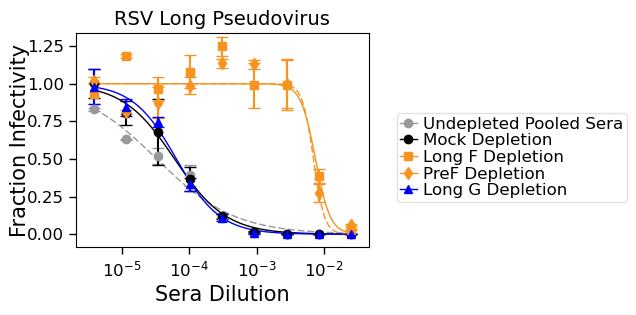

In [5]:
import numpy as np

fig, axes = fits.plotViruses(
    xlabel='Sera Dilution', max_sera_per_subplot=5, 
    colors=['#999999', '#000000', '#F7931E', '#F7931E', '#0000FF'], 
    markers=['o', 'o', 's', 'd', '^'], 
    ylabel='Fraction Infectivity',
    draw_in_bounds=True,
)

# Ensure axes is iterable
if isinstance(axes, np.ndarray):
    axes = axes.flatten().tolist()
elif not isinstance(axes, list):
    axes = [axes]

# Modify line styles using the correct indices
for ax in axes:
    lines = ax.get_lines()
    if len(lines) > 0:
        lines[0].set_linestyle('--')  # First line (gray) dashed
        lines[0].set_dashes([5, 2])   # Custom dash pattern
    if len(lines) > 12:  # Fourth dataset's main curve is at index 12
        lines[12].set_linestyle('--')  # Fourth line (orange) dashed
        lines[12].set_dashes([5, 2])   # Custom dash pattern

# Move legend outside the chart
for ax in axes:
    legend = ax.get_legend()
    if legend:
        legend.set_bbox_to_anchor((1.05, 1))  # Move outside the plot
        legend.set_loc('upper left')

# Save the figure with tight layout to fit the legend
fig.savefig('03_output/plots/241101_DepletedSera_NeutCurve_Fig.svg', bbox_inches='tight')
